In [49]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline 


import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

# Regression

This lab session focuses on a regression analysis and its applications. We will excercise some of the python tools for building and evaluating the regression models. 

Specifically we will look into:
* Simple Linear Regression 
* Multiple Linear Regression
* Polynomial Regression 
* Logistic Regression

Before, getting into lab excercise, we will look into the basics and run codes for regression models from textbook

For future reference: 

* http://scikit-learn.org/stable/modules/linear_model.html

The main concepts while building the regession models are:
- Exploring and visualizing the dataset (EDA)
- Selection of regression models 
- Training regression model 
- Evaluating the model built 
- Fitting these models to dataset under study

## Simple Linear Regression

The simplest relation that can exist in the model is the **linear model**, where the response $\textbf{y}$ (response or target variable) depends linearly from the covariates $\textbf{x}_i$ (feature).

In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter 

$a_0$ is called the constant term or the *intercept*.

$a_1$ is called the coefficient of the explanatory variable *coeff*.

### Example 1 

Create a random data set.

In [50]:
X1 = np.random.randn(300, 2)  # Random points sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]])
X2 = np.dot(X1, A) # np.dot() returns the dot product of two array

In [51]:
A

array([[0.6, 0.4],
       [0.4, 0.6]])

Exploring and visualizing the dataset (EDA)

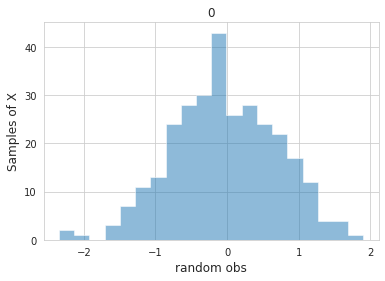

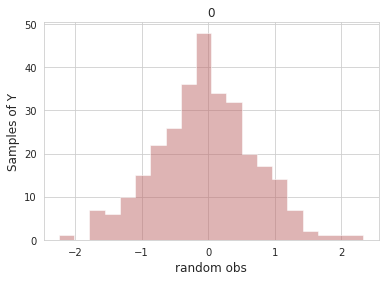

In [52]:
import matplotlib.pyplot as plt
pd.DataFrame(X2[:, 0]).hist(histtype='stepfilled', alpha=.5, bins=20)
plt.xlabel('random obs',fontsize=12)
plt.ylabel('Samples of X',fontsize=12)
pd.DataFrame(X2[:,1]).hist(histtype='stepfilled', alpha=.5, 
                           color=sns.desaturate("indianred", .75), bins=20)
plt.xlabel('random obs',fontsize=12)
plt.ylabel('Samples of Y',fontsize=12)
plt.show()

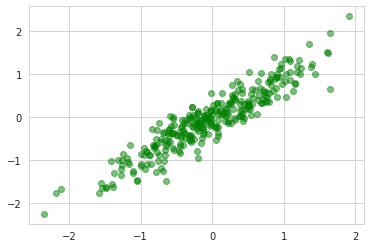

In [53]:
plt.plot(X2[:, 0], X2[:, 1],"o", alpha = 0.5, c='g') 
# alpha, blending value, between 0 (transparent) and 1 (opaque).

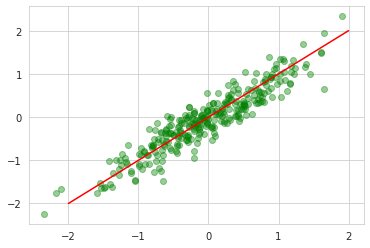

In [54]:
model = [0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.4, c='g');
plt.plot(np.arange(-2,3), model, 'r');
plt.show()
# The red line gives the predicted values of this model

* There could be multiple regression models (in this case, multiple fitting lines), similar to the classifiers, we need to gauage and evaluate. 
* The best fitting line is known as regression line 
* Another important terminalogy is the **residual** or **offsets** which is nothing but an errors of the prediction with the real parameters.

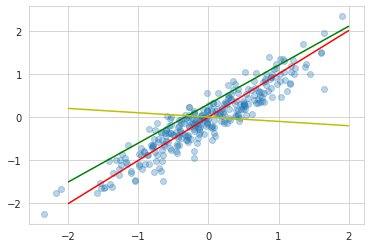

In [55]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
# We can use several parameters and we do not know which is the best model
model1 = [0.0 + 1.0*x for x in np.arange(-2,3)]
model2 = [0.3 + 0.9*x for x in np.arange(-2,3)]
model3 = [0.0 - 0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1, 'r')
plt.plot(np.arange(-2,3), model2, 'g')
plt.plot(np.arange(-2,3), model3, 'y')

## Ordinary Least Squares 

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $a$'s 
of the simple linear regression: $\textbf{y} = a_0+a_1 \textbf{x}$, 
are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

## Example 2 - SeaIce 

* Loading Sea Ice Data and climate change dataset
* Dataset: **SeaIce.txt **
* Preprocessing and Data Cleaning is necessary


In [56]:
# Load data 
ice = pd.read_csv('SeaIce.txt', delim_whitespace = True)
print('shape:', ice.shape)
ice.head()

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


In [57]:
ice.mean() 
# Observation: a negative mean?

year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

Text(0, 0.5, 'Extent')

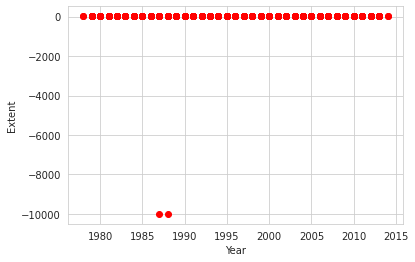

In [58]:
# Visualize the data
x = ice.year
y = ice.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Year')
plt.ylabel('Extent')

Observation from above: 
    
- We see that there is an anamoly in the dataset
- "-9999" does not seems to be a data, this value has potential to impact the regression line
- One has to be very careful in analyzing this type of outliers. This is where, EDA (Exploratory Data Analysis) comes into picture
- Data Cleaning and Pre-processing is very much essential in this case.

In [59]:
# Data Cleaning 
print('Different values in data_type field:\n', np.unique(ice.data_type.values) , '\n')  # there is a -9999 value!)
# Let's see what type of data we have more than Goddard and NRTSI-G 
print(ice[(ice.data_type != 'Goddard')
          & (ice.data_type != 'NRTSI-G')])

Different values in data_type field:
 ['-9999' 'Goddard' 'NRTSI-G'] 

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


shape: (422, 6)


Text(0, 0.5, 'Extent')

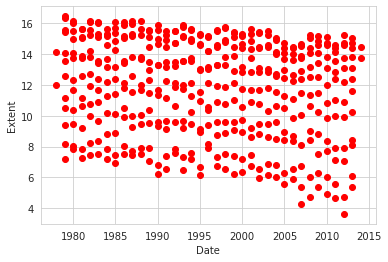

In [60]:
# We can easily clean the data now:
ice2 = ice[ice.data_type != '-9999']
print('shape:', ice2.shape)
# And repeat the plot
x = ice2.year
y = ice2.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Date')
plt.ylabel('Extent')

In [61]:
SeaIce = ice2

## Linear Regression

Let's look at our data extent by month. 

https://seaborn.pydata.org/generated/seaborn.lmplot.html

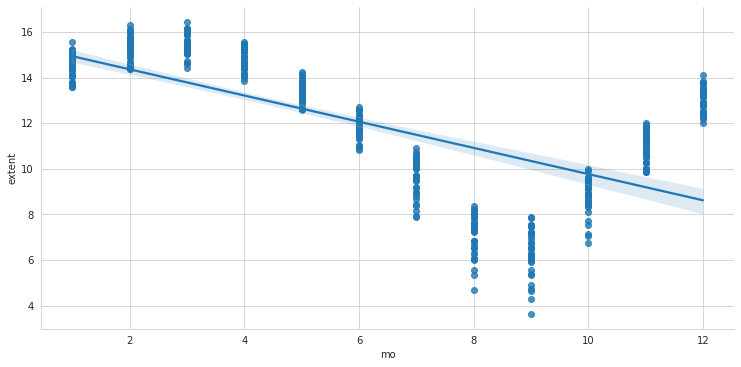

In [62]:
sns.lmplot("mo", "extent", SeaIce, height = 5.2, aspect = 2);

In [63]:
# Compute the mean for each month.
grouped = SeaIce.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
print ('Means:', month_means)
print ('Variances:',month_variances)

Means: mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances: mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


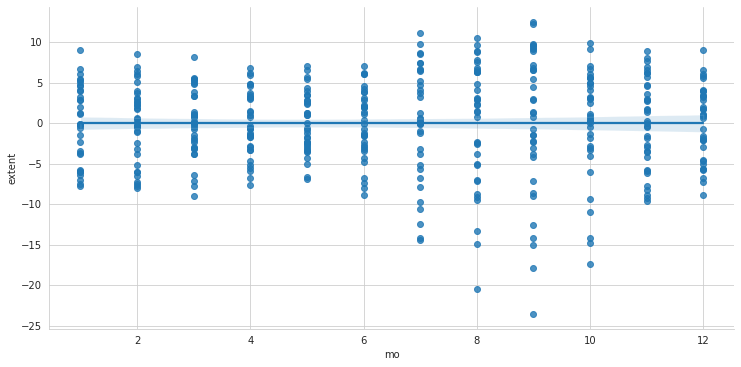

In [64]:
# Data normalization
for i in range(12):
    SeaIce.extent[SeaIce.mo == i+1] = 100*(SeaIce.extent[SeaIce.mo == i+1] 
                                           - month_means[i+1])/month_means.mean()
    
sns.lmplot("mo", "extent", SeaIce, size = 5.2, aspect = 2);

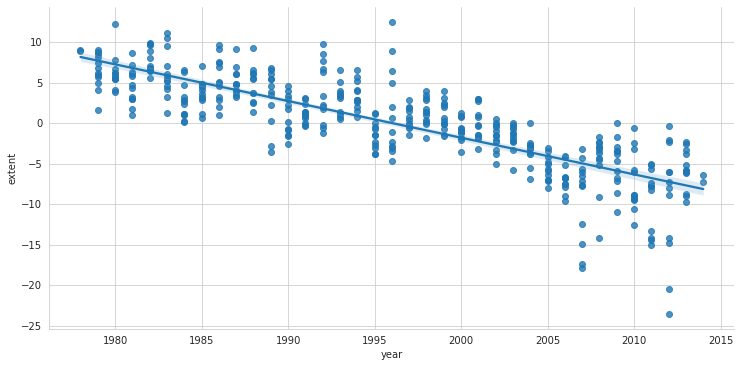

In [65]:
# Plot extent by year 

sns.lmplot("year", "extent", SeaIce,size = 5.2, aspect = 2);

Note, we could look at the trends for each month in a separate small multiples plot. 

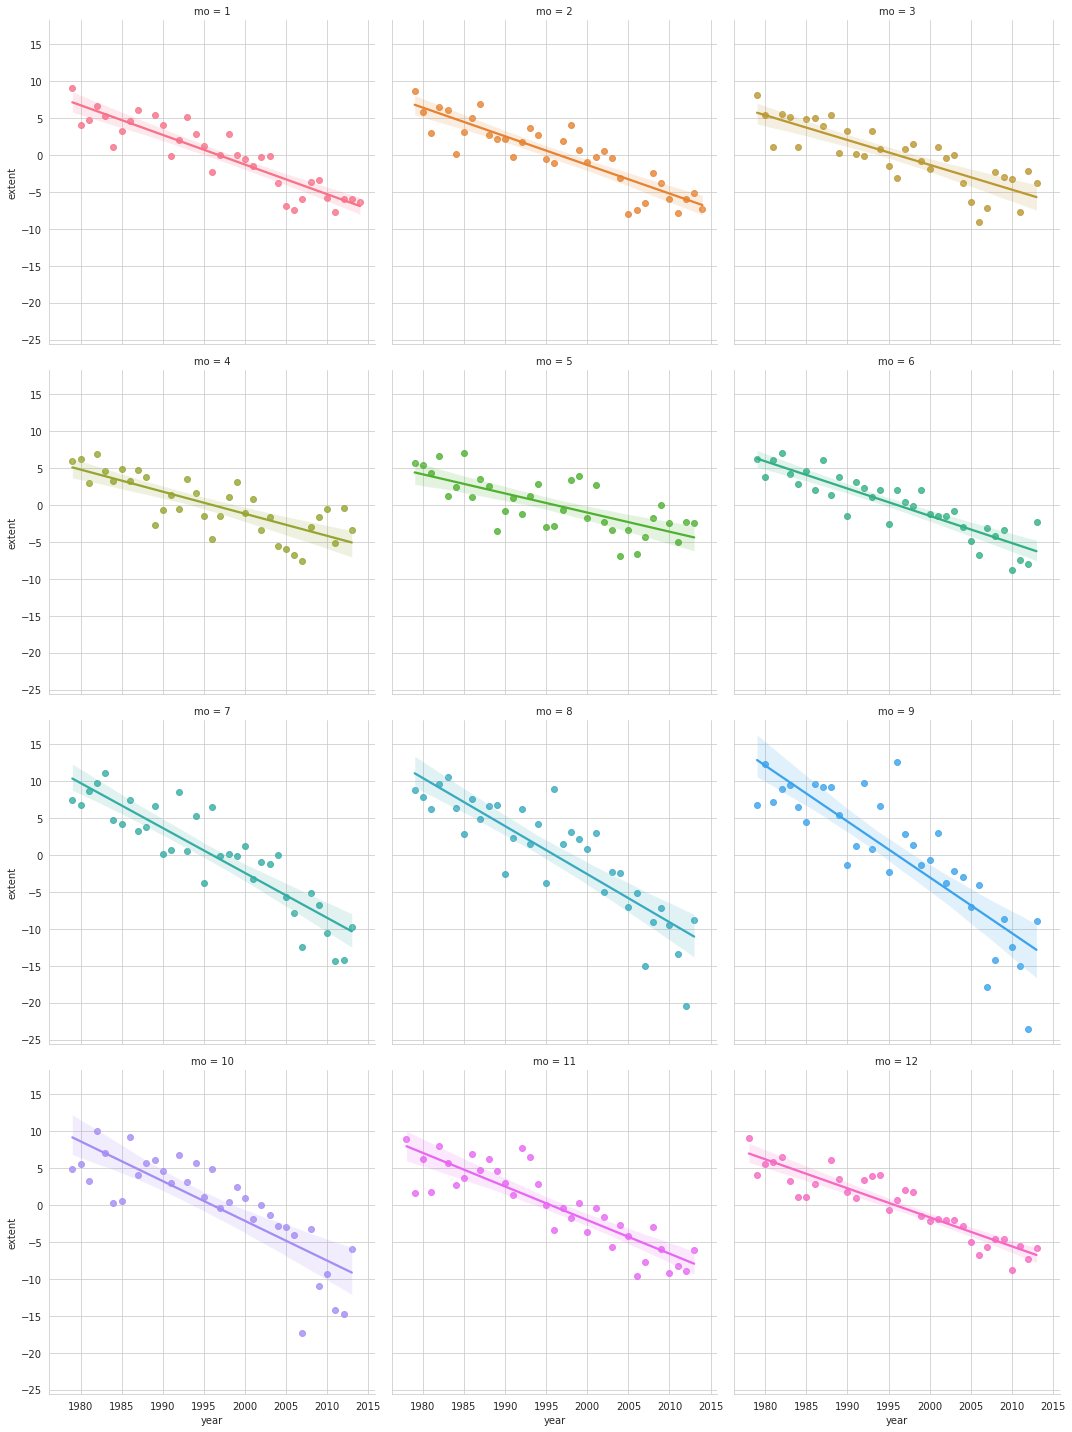

In [66]:
sns.lmplot(x="year", y="extent", hue="mo", col="mo", data=SeaIce, col_wrap=3) 

We can also compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

For that we use using **Scikit-learn**, library that provides a variety of both supervised and unsupervised machine learning techniques.
Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 
The <code>Estimator.fit</code> method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called feature matrix and a one-dimensional numpy array $\textbf{y}$ that holds the responses. Some estimators allow the user to control the fitting behavior. 
For example, the <code>sklearn.linear_model.LinearRegression</code> estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object.
During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore ('_'). For example, the coefficients of a LinearRegression estimator are stored in the attribute coef_.

Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\hat{\textbf{y}}$.

## Linear Regression with `sklearn`

In [67]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = SeaIce[['year']]
y = SeaIce[['extent']]

est.fit(x, y)

print("Coefficients:", est.coef_)
print("Intercept:", est.intercept_)

Coefficients: [[-0.45275459]]
Intercept: [903.71640207]


Text(0, 0.5, 'extent (All months)')

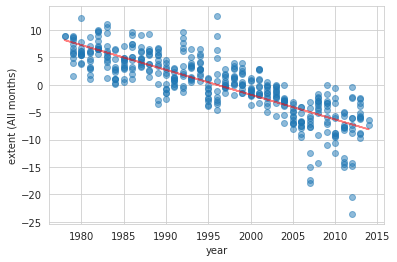

In [68]:
from sklearn import metrics

# Analysis for all months together.  
x = SeaIce[['year']]
y = SeaIce[['extent']]     
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x) 
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')

### Q1. Residuals plot 

Plot the residuals from the example above. 

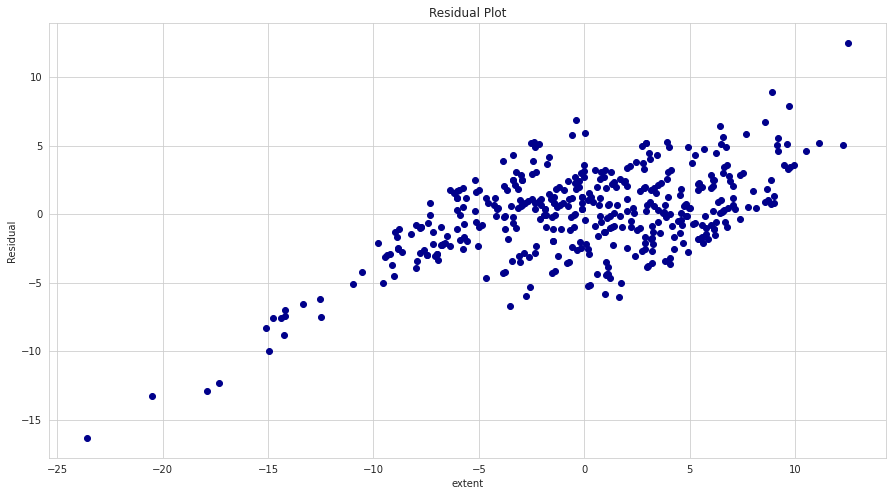

In [69]:
residuals = y-y_hat
plt.figure(figsize=(15,8))
plt.plot(y,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("extent")
plt.ylabel("Residual");

### Q2. Calculate model performance 

Evaluate the performance of linear regression using MSE and R2 as a measure.

We can evaluate the model by computing: 

* Mean squared error - MSE 
* Coefficient of dtermination $R^2$ 

The coefficient $R^2$ is defined as 

$(1 - \textbf{u}/\textbf{v})$,

where $\textbf{u}$ is the residual sum of squares $\sum (\textbf{y} - \hat{\textbf{y}})^2$ and $\textbf{v}$ is the regression sum of squares $\sum (\textbf{y} - \bar{\textbf{y}})^2$, where $\bar{\textbf{y}}$ is the mean.

The best possible score for $R^2$ is 1.0: lower values are worse.

These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

In [70]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

print("MSE:", mse(y, y_hat))
print("R^2:", r2(y, y_hat))

print('''\nYes, based on the Linear Regression plot, there is a negative trend 
      in the evolution of sea ice extent over recent years.''')

MSE: 10.539131639803482
R^2: 0.6696968386888761

Yes, based on the Linear Regression plot, there is a negative trend 
      in the evolution of sea ice extent over recent years.


## Multiple Linear & Polynomial Regression 

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

### Boston data set 

**Attributes**
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000 dollars
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [71]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [72]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target

Data visualization: 

* Plot of price vs Average no of rooms per dwelling
* Use lmplot (price and RM)

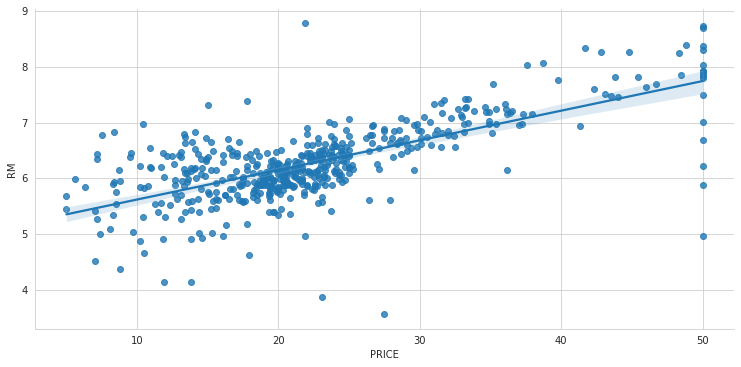

In [73]:
# Visualization of the relations between price and RM
sns.lmplot("PRICE","RM", df_boston, height = 5.2,aspect=2)

* Plot of price vs  % lower status of the population
* Use lmplot (Price and Lstat)

MSE: 23.200208918044186
R^2: 0.5441462975864798


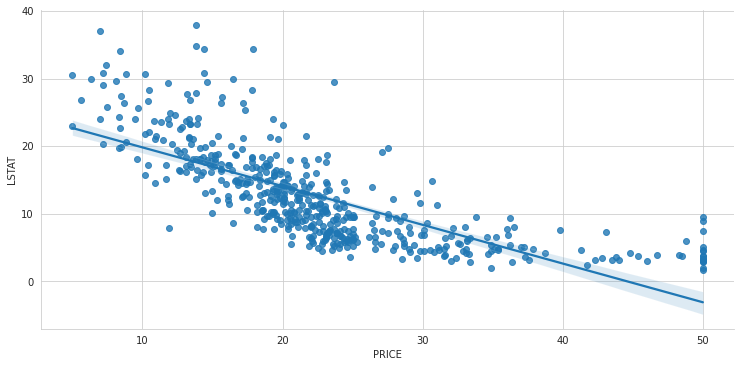

In [74]:
# Visualization of the relations between price and LSTAT
sns.lmplot("PRICE", "LSTAT", df_boston, height = 5.2, aspect = 2)
from sklearn import metrics
x = df_boston[['PRICE']]
y = df_boston[['LSTAT']]
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

print ("MSE:", metrics.mean_squared_error(y, y_hat))
print ("R^2:", metrics.r2_score(y, y_hat))

**We see that the regression line is poorly fit and which causes large MSE and low R2 score **

**We can now look into multiple linear regression and polynomial linear regression **

### Q3. Apply higher order regression 

Apply different order to the linear regression and observe the plot.
* Let interested variable be LSTAT and price.
* Multiple linear regression can be realised using the `order` parameter in `lmplot` 
* Try changing the order to 2, 3, 5 and 10

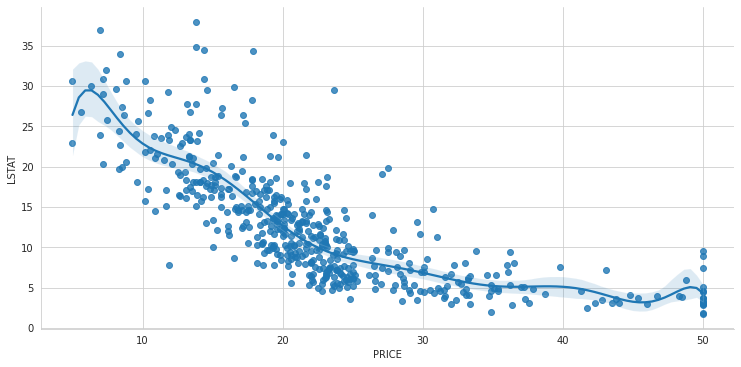

In [75]:
sns.lmplot("PRICE", "LSTAT", df_boston, height = 5.2, aspect = 2,order=10);


### Analyze relationships of variables to target 

Applying linear regression and finding the relationship for each variable is a time-consuming. There are various functions that help to analyze the complete dataset and its relation. A few of them are
* Correlation (corr) - Used to compute the Correlation between variable. Available in pandas 'corr'. Various correlation methods can be applied - pearson, spearman and kendall. - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
* Heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
* Scatterplot matrix - https://seaborn.pydata.org/examples/scatterplot_matrix.html

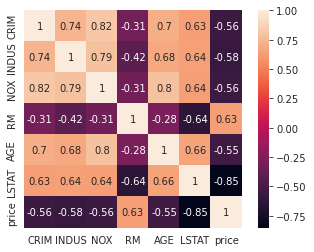

In [76]:
# Heatmap 
indexes = [0, 2, 4, 5, 6, 12] #To plot just some of the variables
df2 = pd.DataFrame(boston.data[:, indexes], columns = boston.feature_names[indexes])
df2['price'] = boston.target
corrmat = df2.corr(method='spearman')

# Draw the heatmap using seaborn
sns.heatmap(corrmat, square = True, annot=True)

As we can see the LSTAT and Price has a largest correlation of -0.85 and from Scatter plot, it is evident that the data is nonlinear. Some more EDA are Scatter Matrix Plot

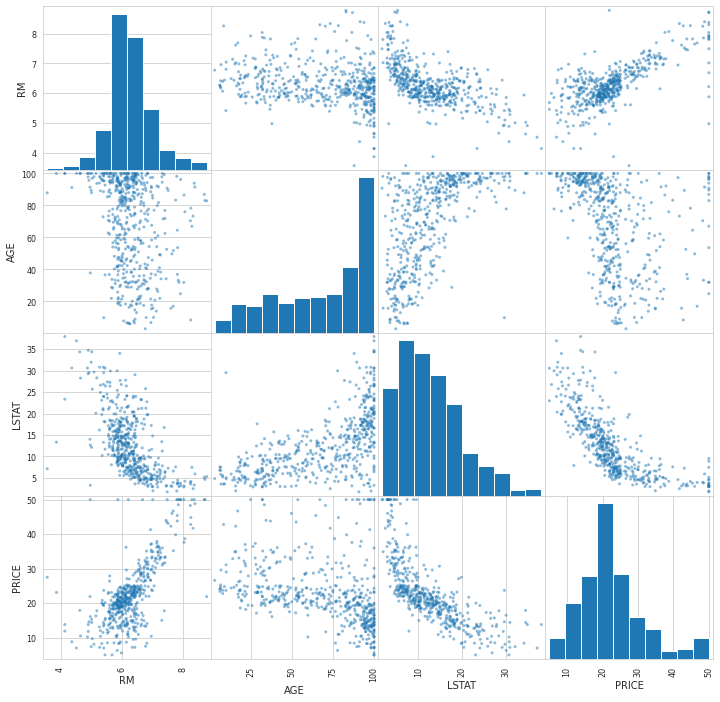

In [77]:
indexes = [5, 6, 12]
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['PRICE'] = boston.target
pd.plotting.scatter_matrix(df2, figsize = (12.0, 12.0));  

Using Seaborn, we can also fit linear regression models to the scatter matrix plots

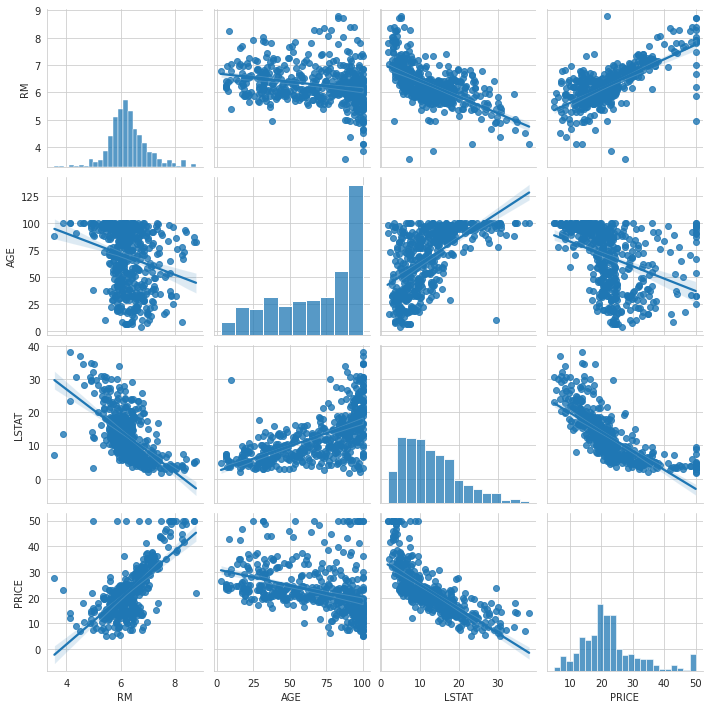

In [78]:
sns.pairplot(df2, kind="reg", aspect=1.0)

### Q4.  Linear Regression on Boston data 

- Split the boston dataset into training and testing (80:20)
- Apply Linear Regression
- Find the coefficient and intercepts of the predicted model
- Compute testing and training scores 
- Find MSE
- use variables by name - X_train, X_test, y_train, y_test, X_boston,y_boston, 

Refs:    
* For MSE, refer to http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* Applying Linear Regression and finding coefficient, look into : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets

boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target

# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_boston,y_boston,
                                    test_size = 0.2, random_state=5)
print ('Training and testing set sizes', X_train.shape, X_test.shape)

Training and testing set sizes (404, 13) (102, 13)


In [80]:
# fitting linear regression
regr_boston = linear_model.LinearRegression()
regr_boston.fit(X_train, y_train)
print('Intercept:', regr_boston.intercept_ )
print('\nCoeff :', regr_boston.coef_)

Intercept: 37.91248700974936

Coeff : [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]


In [81]:
# Best possible score is 1.0, lower values are worse.

from sklearn.metrics import mean_squared_error, r2_score
y_train_predict = regr_boston.predict(X_train)
y_test_predict = regr_boston.predict(X_test)

print('Training Score:', r2_score(y_train, y_train_predict))
print('Testing Score:', r2_score(y_test, y_test_predict))
print('Training MSE: ', mean_squared_error(y_train, y_train_predict))
print('Testing MSE: ', mean_squared_error(y_test, y_test_predict))

Training Score: 0.738339392059052
Testing Score: 0.7334492147453064
Training MSE:  22.477090408387625
Testing MSE:  20.869292183770902


### Q5. Polynomial Regression 

Let's now do the same analysis with Polynomial regression.  Use the same split of the data as above.  Explore using a quadratic and cubic model.  Report out the MSE, R^2 on the training and testing data.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#



In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly_features= PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(X_train)

model = linear_model.LinearRegression()
model.fit(x_poly_train, y_train)

# prediction on the training dataset
ypredict_quad = model.predict(x_poly_train)

# prediction on the testing dataset
x_poly_test = poly_features.fit_transform(X_test)
ypredict_quad_test = model.predict(x_poly_test)


print('Training R2 score:', r2_score(y_train, ypredict_quad))
print('Training MSE:', mean_squared_error(y_train, ypredict_quad))
print('Testing  R2 score:', r2_score(y_test, ypredict_quad_test))
print('Testign  MSE:', mean_squared_error(y_test, ypredict_quad_test))

Training R2 score: 0.9315569004651908
Training MSE: 5.879378436747226
Testing  R2 score: 0.8694943908787136
Testign  MSE: 10.217789025722501


In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

poly_features= PolynomialFeatures(degree=3)
x_poly_train = poly_features.fit_transform(X_train)

model = linear_model.LinearRegression()
model.fit(x_poly_train, y_train)

# prediction on the training dataset
ypredict_cubic = model.predict(x_poly_train)

# prediction on the testing dataset
x_poly_test = poly_features.fit_transform(X_test)
ypredict_cubic_test = model.predict(x_poly_test)

print('Training R2 score:', metrics.r2_score(y_train, ypredict_cubic))
print('Training MSE:', metrics.mean_squared_error(y_train, ypredict_cubic))
print('Testing  R2 score:', metrics.r2_score(y_test, ypredict_cubic_test))
print('Testing  MSE:', metrics.mean_squared_error(y_test, ypredict_cubic_test))

Training R2 score: 0.9999999999999996
Training MSE: 3.982530434348533e-14
Testing  R2 score: -2107.709872611353
Testing  MSE: 165099.05390178828
